# 第一讲 Stata 入门

## 1. stata 界面：
    

- 结果界面
- 命令界面
- 命令回顾窗口
- 变量名窗口

# 第二讲 命令

### 命令格式

In [ ]:
// [by varlist:] command [varlist] [=exp] [if exp] [in range] [weight] [,options]

1. [by varlist] ：分类操作

2. command [varlist] ：命令

3. [=exp] ：赋值及运算表达式

4. [if exp] ：条件表达式

5. [in range] ：范围筛选

6. [weight] ：加权
 
7. [,options] ：其他可选项

### 常用命令

In [ ]:
* 帮助查找
help
search


* 打开和保存数据
clear
use
save

* 导入数据
input
edit
infile
insheet

* 重整数据
append
merge
xpose
reshape
generate
egen//?
rename
drop
keep
sort
encode
decode
order
by

* 报告数据
describe
codebook
list
count
inspect
table
tabulate

* 显示和保存结果
display
log

# 第三讲 数据

## 数据类型：数值、字符、日期

In [ ]:
*===============================数据获取========================================

use auto,clear          // use 只能打开后缀为“.dat”的数据
sysuse auto,clear

use nlswork, clear
webuse nlswork,clear //   在线获取stata 官方数据

use http://fmwww.bc.edu/ec-p/data/wooldridge/CEOSAL1  // 获取伍德里奇计量经济学数据

数值：byte、int、long、float、double

In [ ]:
lxh
sum t*
by for sum pri weigh
by fore: sum pri weigh
by fore,sort: sum pri weigh
gen nprice = price +10//新生成一列
list price nprice
replace nprice=nprice-10//替换一列
list price nprice
drop nprice//删除一列
sum price 1/5//
sum price in 1/5//选择范围：in
sum
list price in 1/10,sep =5//选择步长
list price in 1/10,sep(5)
list price in 1/8,nohead//不显示表头
clear
set obs 1 //样本量设置
gen a =1
d
compress //压缩
d
replace a = 100
compress
d
replace  a= 32741
gen double b = 1
recast double a //讲a生成双精度
recast double a
d

webuse destring, clear
webuse destring1, clear
d
sum
destring,replace
sum
gen nincom = income*1.3
list
webuse destring2,clear
list
destring date,replace
date
list date
destring date,replace ignore" " 
destring date,replace ignore (" ") //文本清洗并转数字
list date

destring price percent, replace ignore("$,%") //文本转数字
list
by percent,sort:list price //分类排序
sort:list price//?
sort price
list
list sort date//?
list, sort date//?
sort,list date
webuse census10,clear
d
list in 1/4 //1到4
format state %-14s //格式设置

list in 1/4
format region  %-8.0g
list in 1/4
format pop %12.0gc
list in 1/4
gen id = -n
gen id = _n
replace id=9812 in 3 //替换第三个值
list in 1/4
format id %05.0f//用0补齐
list in 1/4

## input

In [ ]:
clear
input id str10 name economy
1 join 40
2 Chair 30
3 Jack 60
4 huang 90
5 Tom 50
end
save economy, ereplace 

## 导入其他数据

In [ ]:
insheet using 3origin.txt,clear
infile id str10 name gender minority economy math using origin.txt,clear //先指出变量名
infix  //每个变量位数确定

// 导出
outsheet using myresult.txt,nonames replace

## 加标签：label

In [ ]:
label data '***'
label var '***'
label values gender genderlb
label define genderlb 1'男' 0'女'
note:.....    // note 查看
label define 。。。,modify
label define 。。。,add

label list
label dir
label drop ...

## 保存和删除

In [ ]:
save
erase  //必须加后缀

*=============================数据整理===========================================
drop:删除变量或观察值
keep：保留变量或观察值
append：观察值拼接
merge：变量合并
reshape：数据重整
stack：多列转为一列
xpose：数据转置

// 案例
//数据创建
chdir /Users/mac/MyPrograme/Stata资料
mkdir data
chdir /Users/mac/MyPrograme/Stata资料/data
clear
input id str10 name gender minority economy math
1 John 1 1 40 68
2 Chris 1 2 80 52
3 Jack 0 2 90 76
4 Huang 0 2 43 90
5 Tom 0 3 70 96
end
save mydata

# 第四讲 数据整理

In [1]:
sysuse auto

sum price
sum price weight

sum weight price length


(1978 Automobile Data)


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
       price |         74    6165.257    2949.496       3291      15906


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
       price |         74    6165.257    2949.496       3291      15906
      weight |         74    3019.459    777.1936       1760       4840


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
      weight |         74    3019.459    777.1936       1760       4840
       price |         74    6165.257    2949.496       3291      15906
      length |         74    187.9324    22.26634        142        233


(note: scheme plotplain not found, using s2color)


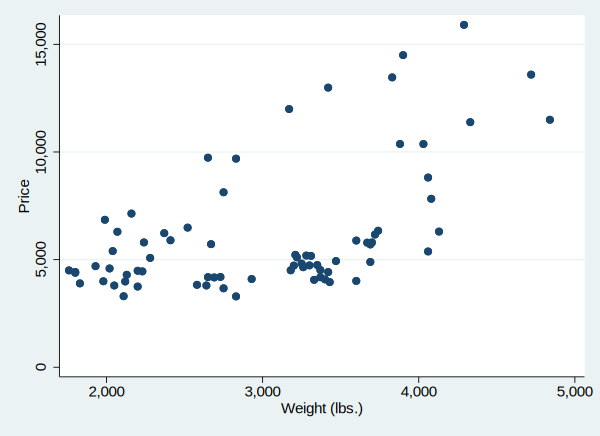

In [2]:
scatter price weight

In [8]:
clear
set obs 1000
gen x=_n //生成1—1000的边疆自然数，变量名为x
gen y = x+1000



number of observations (_N) was 0, now 1,000




### 案例1:横向拆分

In [ ]:
clear
use mydata
drop economy math  //删除eco\math列
save students,replace
use mydata,clear
keep id economy //保留eco列
save economy
use mydata,clear
keep id math //保留math列
save math
clear

clear
use mydata
drop economy math
save students,replace
use mydata,clear
keep id economy
save economy
use mydata,clear
keep id math
save math
clear

### 案例2:纵向拆分

In [ ]:
use mydata,clear
list
keep if gender==1 //保留符合条件行
save male
use mydata,clear
drop if gender == 1 //删除符合条件行
save female

### 案例3:横向连接数据文件

In [ ]:
chdir /Users/mac/MyPrograme/Stata资料/data
use economy,clear
sort id
save economy,replace
use math,clear
sort id
merge id using economy
tab_merge  //显示对接情况
drop_merge
sort id
save m_e, replace
use students,clear
sort id
merge id using m_e
tab_merge  //显示对接情况
drop_merge
save mymerge

### 案例4:纵向连接数据文件

In [ ]:
use male,clear
append using female

### 案例5:面板数据重整--宽变长

In [ ]:
reshape long 


### 案例6:面板数据重整--长变宽

In [ ]:
reshape wide 


### 案例7: 多列变一列

In [ ]:
stack 。。。 into 。。
。

### 案例8: 转置

In [ ]:
xpose,clear


# 第五讲 函数和运算符

## 运算符 exp

Stata 共有四中运算，代数、字符、关系和逻辑。

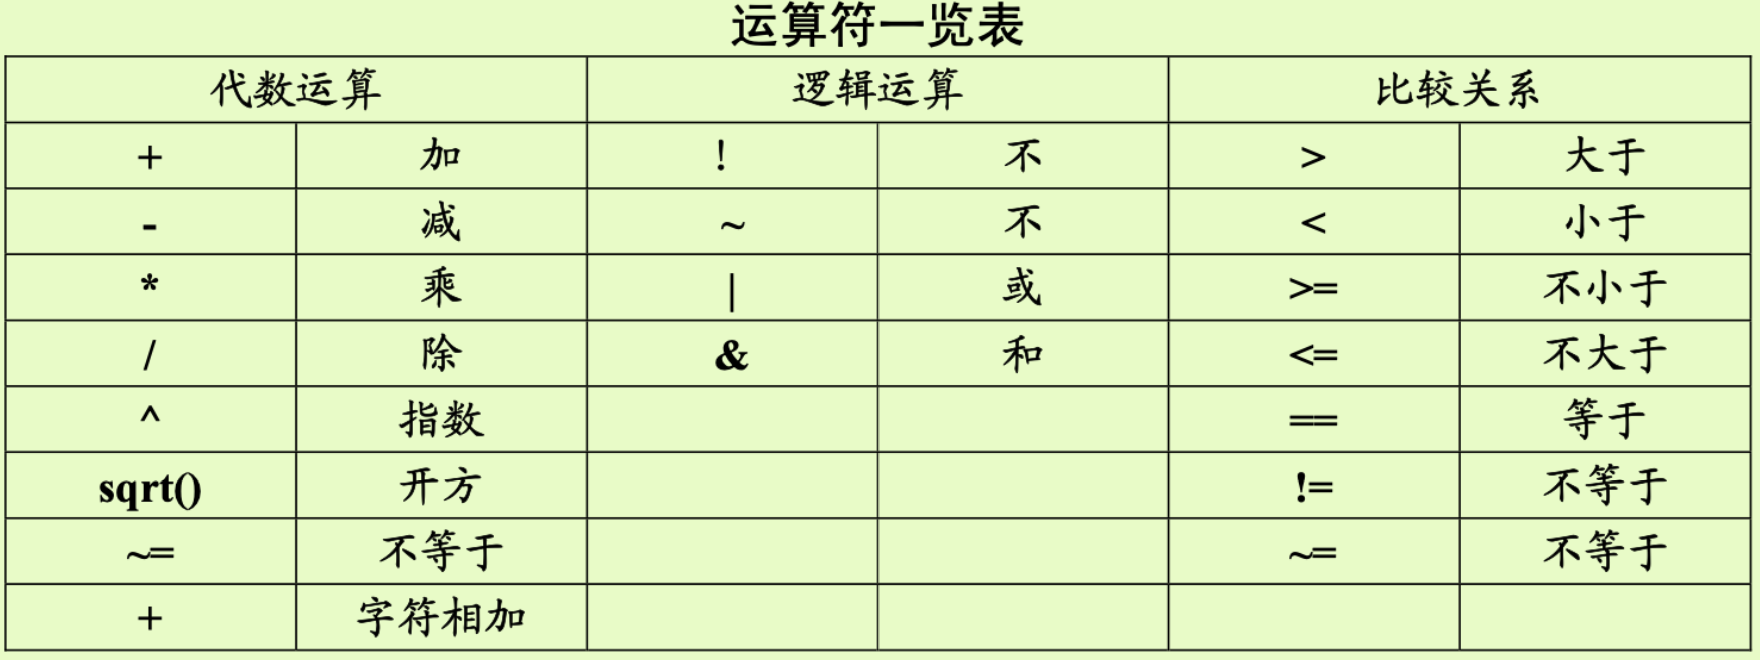

运算的优先序: `! (或~), ^, - (负号) , /, *, - (减) , +, !=(或~=),>,<,<=,>=,==,&,|`

In [6]:
di 1+2 

3


In [7]:
di 2^3 

8


In [8]:
di sqrt(3)

1.7320508


In [13]:
sysuse auto.dta,clear
gen nprice = price + foreign*100
list nprice price foreign in -5/-1 


(1978 Automobile Data)



     +---------------------------+
     | nprice    price   foreign |
     |---------------------------|
 70. |   7240    7,140   Foreign |
 71. |   5497    5,397   Foreign |
 72. |   4797    4,697   Foreign |
 73. |   6950    6,850   Foreign |
 74. |  12095   11,995   Foreign |
     +---------------------------+


In [14]:
scalar a = "我爱"+"Stata"

In [15]:
scalar list a

         a = 我爱Stata


In [16]:
di 3~=4 

1


In [18]:
di 3==4 

0


因为系统缺失值大于任何一个数据，我们可以利用条件语句排除缺失值。

In [24]:
clear
input age 
38
.
65
42
28
80
end




            age


In [25]:
destring age,replace 

. brow

age already numeric; no replace


In [26]:
gen agegrp1=(age>65) 
gen agegrp2=(age>65) if age<.

(1 missing value generated)


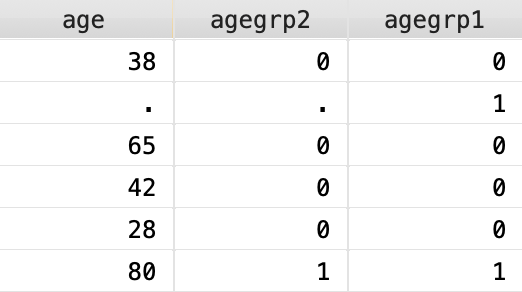

In [3]:
help function

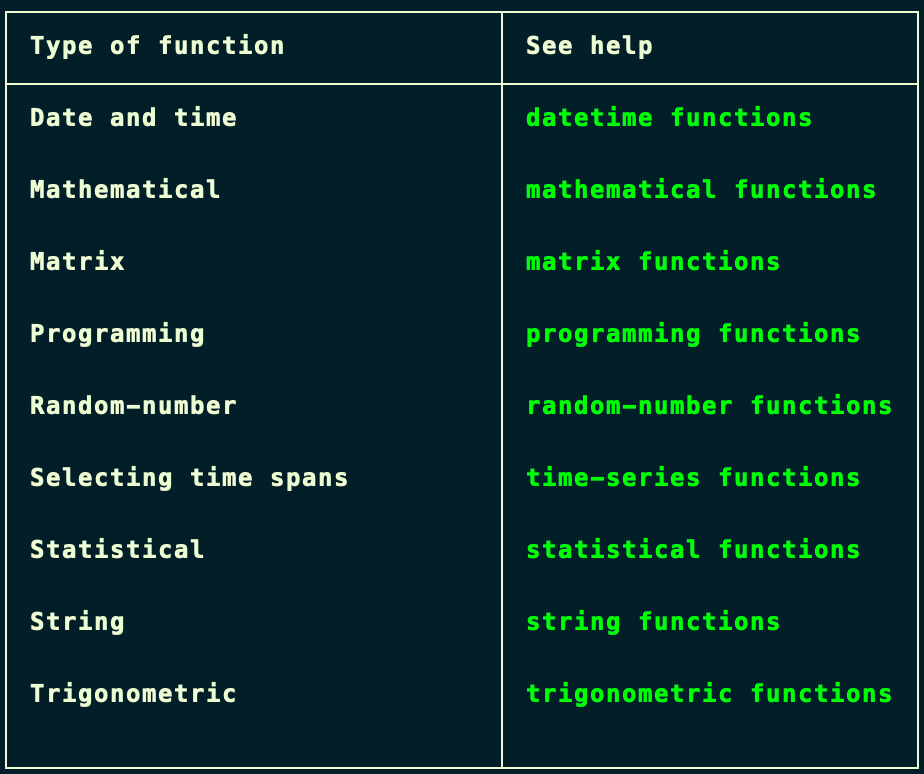

In [28]:
clear
set obs 5 
gen x=_n
gen y=sum(x)




number of observations (_N) was 0, now 5




In [29]:
list x y


     +--------+
     | x    y |
     |--------|
  1. | 1    1 |
  2. | 2    3 |
  3. | 3    6 |
  4. | 4   10 |
  5. | 5   15 |
     +--------+


In [30]:
egen z=sum(x)

list z




     +----+
     |  z |
     |----|
  1. | 15 |
  2. | 15 |
  3. | 15 |
  4. | 15 |
  5. | 15 |
     +----+


In [31]:
egen r=rsum(x y z) //带有函数的生成
l r




     +----+
     |  r |
     |----|
  1. | 17 |
  2. | 20 |
  3. | 24 |
  4. | 29 |
  5. | 35 |
     +----+


In [32]:
l r


     +----+
     |  r |
     |----|
  1. | 17 |
  2. | 20 |
  3. | 24 |
  4. | 29 |
  5. | 35 |
     +----+


In [33]:
egen havg=rowmean(x y z)
list havg 




     +-----------+
     |      havg |
     |-----------|
  1. | 5.6666667 |
  2. | 6.6666667 |
  3. |         8 |
  4. | 9.6666667 |
  5. | 11.666667 |
     +-----------+


In [34]:
egen hsd=rowsd(x y z)
list hsd 




     +-----------+
     |       hsd |
     |-----------|
  1. | 8.0829038 |
  2. | 7.2341781 |
  3. |  6.244998 |
  4. | 5.5075705 |
  5. | 5.7735027 |
     +-----------+


In [35]:
egen hmax=rowmax(x y z)
list hmax 




     +------+
     | hmax |
     |------|
  1. |   15 |
  2. |   15 |
  3. |   15 |
  4. |   15 |
  5. |   15 |
     +------+


In [36]:
egen stdx=std(x)
list stdx




     +------------+
     |       stdx |
     |------------|
  1. | -1.2649111 |
  2. | -.63245553 |
  3. |          0 |
  4. |  .63245553 |
  5. |  1.2649111 |
     +------------+


In [22]:
help std 

In [37]:
egen byte dxy=diff(x y)

In [39]:
l dxy


     +-----+
     | dxy |
     |-----|
  1. |   0 |
  2. |   1 |
  3. |   1 |
  4. |   1 |
  5. |   1 |
     +-----+


In [41]:
sysuse auto,clear
egen rmpg=rank(mpg) // 求次序
sort rmpg
list mpg rmpg in 1/5


(1978 Automobile Data)




     +------------+
     | mpg   rmpg |
     |------------|
  1. |  12    1.5 |
  2. |  12    1.5 |
  3. |  14    5.5 |
  4. |  14    5.5 |
  5. |  14    5.5 |
     +------------+


## group:交叉分组

In [42]:
clear
input a b 
1 0
0 0
1 1
0 1 
0 0
1 .
. 0
end
egen ab = group(a b) // 交叉分组
egen ab2 = group(a b),missing //missing另为一组




              a           b

(2 missing values generated)



In [43]:
l


     +------------------+
     | a   b   ab   ab2 |
     |------------------|
  1. | 1   0    3     3 |
  2. | 0   0    1     1 |
  3. | 1   1    4     4 |
  4. | 0   1    2     2 |
  5. | 0   0    1     1 |
     |------------------|
  6. | 1   .    .     5 |
  7. | .   0    .     6 |
     +------------------+


## recode：生成虚拟变量

In [44]:
clear 
set obs 100
gen age = _n
recode age (min/30=1)(30/60=2)(60/max=3),gen(agegrp) // 生成虚拟变量



number of observations (_N) was 0, now 100


(99 differences between age and agegrp)


In [49]:
l in 30/40


     +--------------+
     | age   agegrp |
     |--------------|
 30. |  30        1 |
 31. |  31        2 |
 32. |  32        2 |
 33. |  33        2 |
 34. |  34        2 |
     |--------------|
 35. |  35        2 |
 36. |  36        2 |
 37. |  37        2 |
 38. |  38        2 |
 39. |  39        2 |
     |--------------|
 40. |  40        2 |
     +--------------+


## substr:字符串切片

In [51]:
sysuse auto,clear
gen str3 make3 = substr(make,1,3)
list make* in 1/6


(1978 Automobile Data)



     +-----------------------+
     | make            make3 |
     |-----------------------|
  1. | AMC Concord       AMC |
  2. | AMC Pacer         AMC |
  3. | AMC Spirit        AMC |
  4. | Buick Century     Bui |
  5. | Buick Electra     Bui |
     |-----------------------|
  6. | Buick LeSabre     Bui |
     +-----------------------+


## word:取词

In [53]:
sysuse auto,clear
gen name2=word(make,2)
list n* in 1/6


(1978 Automobile Data)

(1 missing value generated)


     +---------+
     |   name2 |
     |---------|
  1. | Concord |
  2. |   Pacer |
  3. |  Spirit |
  4. | Century |
  5. | Electra |
     |---------|
  6. | LeSabre |
     +---------+


## by:分类操作

In [54]:
clear 
input x y 
1 1.1 
1 1.2 
1 1.3 
2 2.1 
2 2.2 
end




              x           y


In [55]:
gen n = _n
gen N = _N
gen z = y[1]
l 






     +-----------------------+
     | x     y   n   N     z |
     |-----------------------|
  1. | 1   1.1   1   5   1.1 |
  2. | 1   1.2   2   5   1.1 |
  3. | 1   1.3   3   5   1.1 |
  4. | 2   2.1   4   5   1.1 |
  5. | 2   2.2   5   5   1.1 |
     +-----------------------+


In [59]:
by x,sort:gen n1=_n
by x,sort:gen N1=_N
by x,sort:gen z1=y[1]
list 






     +---------------------------------------+
     | x     y   n   N     z   n1   N1    z1 |
     |---------------------------------------|
  1. | 1   1.1   1   5   1.1    1    3   1.1 |
  2. | 1   1.2   2   5   1.1    2    3   1.1 |
  3. | 1   1.3   3   5   1.1    3    3   1.1 |
  4. | 2   2.1   4   5   1.1    1    2   2.1 |
  5. | 2   2.2   5   5   1.1    2    2   2.1 |
     +---------------------------------------+


In [61]:
clear 
input hhid age 
1 86
1 42
1 36
1 57
1 28
2 42 
2 5
2 40
end 
save family, replace 




           hhid         age

(note: file family.dta not found)
file family.dta saved


In [62]:
use family,clear
by hhid,sort:gen hhsize=_N // 得到家庭规模
by hhid,sort:gen id=_n+hhid*10 // 编码
by hhid,sort:egen mage=mean(age) // 平均年龄
sort hhid age //每户内按年龄大小排序
by hhid:gen nid=_n // 户内排序

In [63]:
list 


     +---------------------------------------+
     | hhid   age   hhsize   id   mage   nid |
     |---------------------------------------|
  1. |    1    28        5   15   49.8     1 |
  2. |    1    36        5   13   49.8     2 |
  3. |    1    42        5   12   49.8     3 |
  4. |    1    57        5   14   49.8     4 |
  5. |    1    86        5   11   49.8     5 |
     |---------------------------------------|
  6. |    2     5        3   22     29     1 |
  7. |    2    40        3   23     29     2 |
  8. |    2    42        3   21     29     3 |
     +---------------------------------------+


In [66]:
webuse stan2,clear
expand 2 if transplant
sort id
by id:generate byte posttran = (_n==2)
by id:generate t1=stime if _n==_N
gsort -id 


remote connection to proxy failed -- see help r(663) for troubleshooting


r(663);
r(663);


# 第六讲 程序

## 标准的程序文件格式

In [ ]:
clear
version 11
//cd 
capture log close
log using myfile, replace
set more off
log off

sysuse auto, clear
sum
log on
tab forei

log close

## 创造自己的命令

In [1]:
capture program drop hello //capture 相当于 try ... except
program hello   // 相当于def
dis "Hello Stata!"
end 

hello




Hello Stata!


## 暂元

### local

In [2]:
sysuse auto,clear
list price length weight in 1/5


(1978 Automobile Data)


     +-------------------------+
     | price   length   weight |
     |-------------------------|
  1. | 4,099      186    2,930 |
  2. | 4,749      173    3,350 |
  3. | 3,799      168    2,640 |
  4. | 4,816      196    3,250 |
  5. | 7,827      222    4,080 |
     +-------------------------+


In [3]:
local v3 "price length weight"
list `v3' in 1/5

local cmd "list"
`cmd' `v3' in 1/5




     +-------------------------+
     | price   length   weight |
     |-------------------------|
  1. | 4,099      186    2,930 |
  2. | 4,749      173    3,350 |
  3. | 3,799      168    2,640 |
  4. | 4,816      196    3,250 |
  5. | 7,827      222    4,080 |
     +-------------------------+



     +-------------------------+
     | price   length   weight |
     |-------------------------|
  1. | 4,099      186    2,930 |
  2. | 4,749      173    3,350 |
  3. | 3,799      168    2,640 |
  4. | 4,816      196    3,250 |
  5. | 7,827      222    4,080 |
     +-------------------------+


In [4]:
local pre "pri"
local suf "ce"
`cmd' `pre'`suf' in 1/5

tab rep`=26*3'





     +-------+
     | price |
     |-------|
  1. | 4,099 |
  2. | 4,749 |
  3. | 3,799 |
  4. | 4,816 |
  5. | 7,827 |
     +-------+


     Repair |
Record 1978 |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |          2        2.90        2.90
          2 |          8       11.59       14.49
          3 |         30       43.48       57.97
          4 |         18       26.09       84.06
          5 |         11       15.94      100.00
------------+-----------------------------------
      Total |         69      100.00


### global

In [6]:
sysuse auto,clear
list price length weight in 1/5
global v3 "price length weight"
list $v3 in 1/5

global cmd "list"
$cmd $v3 in 1/5


(1978 Automobile Data)


     +-------------------------+
     | price   length   weight |
     |-------------------------|
  1. | 4,099      186    2,930 |
  2. | 4,749      173    3,350 |
  3. | 3,799      168    2,640 |
  4. | 4,816      196    3,250 |
  5. | 7,827      222    4,080 |
     +-------------------------+



     +-------------------------+
     | price   length   weight |
     |-------------------------|
  1. | 4,099      186    2,930 |
  2. | 4,749      173    3,350 |
  3. | 3,799      168    2,640 |
  4. | 4,816      196    3,250 |
  5. | 7,827      222    4,080 |
     +-------------------------+



     +-------------------------+
     | price   length   weight |
     |-------------------------|
  1. | 4,099      186    2,930 |
  2. | 4,749      173    3,350 |
  3. | 3,799      168    2,640 |
  4. | 4,816      196    3,250 |
  5. | 7,827      222    4,080 |
     +-------------------------+


### 自带命令参数

In [7]:
cap prog drop listargs
prog listargs
di "第一个参数为：`1'"
di "第二个参数为：`2'"
di "第三个参数为：`3'"
di "第四个参数为：`4'"
end 

In [8]:
listargs 

第一个参数为：
第二个参数为：
第三个参数为：
第四个参数为：


In [9]:
listargs I love stata 

第一个参数为：I
第二个参数为：love
第三个参数为：stata
第四个参数为：


In [10]:
listargs "I love stata"

第一个参数为：I love stata
第二个参数为：
第三个参数为：
第四个参数为：


In [11]:
local i "I love stata"
listargs i 



第一个参数为：i
第二个参数为：
第三个参数为：
第四个参数为：


In [12]:
capture prog drop listargs
prog listargs
args a b c d 
di "第一个参数为：`1'"
di "第二个参数为：`2'"
di "第三个参数为：`3'"
di "第四个参数为：`4'"
end 

In [13]:
listargs this is a test 

第一个参数为：this
第二个参数为：is
第三个参数为：a
第四个参数为：test


### 标量

In [14]:
scalar a=2
dis a+2



4


In [15]:
scalar s="hello"
di s



hello


In [24]:
clear
input a b
    1 3
    3 4
    5 6
end




              a           b


In [25]:
gen v=a*b

In [26]:
list v 


     +----+
     |  v |
     |----|
  1. |  3 |
  2. | 12 |
  3. | 30 |
     +----+


In [27]:
sysuse auto,clear
sum price
return list 


(1978 Automobile Data)


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
       price |         74    6165.257    2949.496       3291      15906


scalars:
                  r(N) =  74
              r(sum_w) =  74
               r(mean) =  6165.256756756757
                r(Var) =  8699525.974268788
                 r(sd) =  2949.495884768919
                r(min) =  3291
                r(max) =  15906
                r(sum) =  456229


In [28]:
local sum=r(sum) // 将总和存入 sum 暂元

In [31]:
di `sum'

456229


### 临时变量和临时数据文件

In [53]:

clear 
set obs 5
tempvar x y // 指明临时变量x,y
gen `x'=_n
gen `y'=_N
edit

gen z=`x'+`y'
edit



number of observations (_N) was 0, now 5








In [52]:
// # 不好的例子
sysuse auto,clear
preserve // 之后的操作不改变内存中数据
keep price weight
save master,replace
drop weight
save part1,replace
use master,clear
drop price
rename weight price
append using part1
erase master.dta 
erase part1.dta 
restore  // 回到preserve命令前的数据


(1978 Automobile Data)



(note: file master.dta not found)
file master.dta saved


(note: file part1.dta not found)
file part1.dta saved

(1978 Automobile Data)








In [55]:
// 改进:不会产生垃圾文件，也不会破坏原数据
sysuse auto,clear 
preserve
keep price weight
tempfile master part1
save "`master'"
drop weight 
save "`part1'"
use "`master'",clear
drop price
rename weight price
append using "`part1'"
restore 


(1978 Automobile Data)

already preserved


r(621);
r(621);


### $\star $基尼系数创建案例

# 第七讲 流程控制

### while

In [1]:
capture drop count5
program count5
local i = 1
while `i'<=5{
    di `i'
    local i = `i'+1
}
end

In [2]:
count5

1
2
3
4
5


### forvalues

In [3]:
forvalues i=1/5{
    dis `i'
}


1
2
3
4
5


In [4]:
forvalues i=4 (-0.2) 0{
    disp `i'
}


4
3.8
3.6
3.4
3.2
3
2.8
2.6
2.4
2.2
2
1.8
1.6
1.4
1.2
1
.8
.6
.4
.2


In [11]:
// sum of 1+2+3+...+100
scalar s=0
forvalues i=1/100{
scalar s= s+`i'
}
scalar list s




         s =       5050


In [14]:
webuse http://fmwww.bc.edu/ec-p/data/wooldridge/wage1,clear
foreach v of varlist nonwhite-servocc{
    tab `v'
}


file
    http://www.stata-press.com/data/r15/http://fmwww.bc.edu/ec-p/data/wooldrid
    > ge/wage1.dta not found


r(601);
r(601);


In [15]:
sysuse auto,clear
list * in 1/5


(1978 Automobile Data)


     +-----------------------------------------------------------------+
  1. | make          | price | mpg | rep78 | headroom | trunk | weight |
     | AMC Concord   | 4,099 |  22 |     3 |      2.5 |    11 |  2,930 |
     |-----------------------------------------------------------------|
     |  length   |  turn   |  displa~t   |   gear_r~o   |    foreign   |
     |     186   |    40   |       121   |       3.58   |   Domestic   |
     +-----------------------------------------------------------------+

     +-----------------------------------------------------------------+
  2. | make          | price | mpg | rep78 | headroom | trunk | weight |
     | AMC Pacer     | 4,749 |  17 |     3 |      3.0 |    11 |  3,350 |
     |-----------------------------------------------------------------|
     |  length   |  turn   |  displa~t   |   gear_r~o   |    foreign   |
     |     173   |    40   |       258   |       2.53   |   Domestic   |
     +------------------

In [16]:
sysuse auto,clear
foreach v of varlist price-weight{
    tab `v'
}


(1978 Automobile Data)


      Price |      Freq.     Percent        Cum.
------------+-----------------------------------
      3,291 |          1        1.35        1.35
      3,299 |          1        1.35        2.70
      3,667 |          1        1.35        4.05
      3,748 |          1        1.35        5.41
      3,798 |          1        1.35        6.76
      3,799 |          1        1.35        8.11
      3,829 |          1        1.35        9.46
      3,895 |          1        1.35       10.81
      3,955 |          1        1.35       12.16
      3,984 |          1        1.35       13.51
      3,995 |          1        1.35       14.86
      4,010 |          1        1.35       16.22
      4,060 |          1        1.35       17.57
      4,082 |          1        1.35       18.92
      4,099 |          1        1.35       20.27
      4,172 |          1        1.35       21.62
      4,181 |          1        1.35       22.97
      4,187 |          1        1.35       

      2,410 |          1        1.35       29.73
      2,520 |          1        1.35       31.08
      2,580 |          1        1.35       32.43
      2,640 |          1        1.35       33.78
      2,650 |          2        2.70       36.49
      2,670 |          1        1.35       37.84
      2,690 |          1        1.35       39.19
      2,730 |          1        1.35       40.54
      2,750 |          2        2.70       43.24
      2,830 |          2        2.70       45.95
      2,930 |          1        1.35       47.30
      3,170 |          1        1.35       48.65
      3,180 |          1        1.35       50.00
      3,200 |          1        1.35       51.35
      3,210 |          1        1.35       52.70
      3,220 |          1        1.35       54.05
      3,250 |          1        1.35       55.41
      3,260 |          1        1.35       56.76
      3,280 |          1        1.35       58.11
      3,300 |          1        1.35       59.46
      3,310 |       

In [17]:
pwd

/Users/mac/myPrograme/MyCode/多软件交互/stata


In [23]:
ls ../lectures18


total 5632
-rw-r--r--@  1 mac  staff     8912  4 23  2020 1.dta
-rw-r--r--@  1 mac  staff     9323  4 23  2020 1.gph
-rw-r--r--@  1 mac  staff    17611  4 23  2020 157模拟正态白噪声.dta
-rw-r--r--@  1 mac  staff      216  4 23  2020 157页模拟正态白噪声.do
-rw-r--r--@  1 mac  staff      455  4 23  2020 165序列相关性检验phillips.do
-rw-r--r--@  1 mac  staff      424  4 23  2020 166PRMINWGE.do
-rw-r--r--@  1 mac  staff      215  4 23  2020 166单位根检验.do
-rw-r--r--@  1 mac  staff      157  4 23  2020 167协整检验.do
-rw-r--r--@  1 mac  staff      443  4 23  2020 167单位根检验nyse.do
-rw-r--r--@  1 mac  staff      332  4 23  2020 167单位根检验nyse2.do
-rw-r--r--@  1 mac  staff      292  4 23  2020 168伪回归问题模拟.do
-rw-r--r--@  1 mac  staff      468  4 23  2020 170经典假设满足时OLS 估计量的小样
> 本性质.do
-rw-r--r--@  1 mac  staff      843  4 23  2020 174-175第二三四假设不成立时.do
-rw-r--r--   1 mac  staff      963  5  3  2020 176简单回归分析.do
-rw-r--r--@  1 mac  staff      853  4 23  2020 178多元回归分析.do
-rw-r--r--@  1 mac  staff     1178  4 23  2020 180非线性回归分析

In [24]:
use mydata,clear
list


(成绩单“)


     +---------------------------------------------------+
     | id      name   gender   minority   economy   math |
     |---------------------------------------------------|
  1. |  1      John       男          1        40     68 |
  2. |  2     Chris       男          2        80     52 |
  3. |  3      Jack        Ů          2        90     76 |
  4. |  4     Huang        Ů          2        43     90 |
  5. |  5       Tom        Ů          3        70     96 |
     |---------------------------------------------------|
  6. |  6       Han       男          1        53     85 |
  7. |  7   Phillip        Ů          2        85     36 |
  8. |  8       Jin       男          2        95     65 |
     +---------------------------------------------------+


In [26]:
local flist  economy math
foreach file in `flist'{
    append using "`file'"
}

In [27]:
list


     +---------------------------------------------------+
     | id      name   gender   minority   economy   math |
     |---------------------------------------------------|
  1. |  1      John       男          1        40     68 |
  2. |  2     Chris       男          2        80     52 |
  3. |  3      Jack        Ů          2        90     76 |
  4. |  4     Huang        Ů          2        43     90 |
  5. |  5       Tom        Ů          3        70     96 |
     |---------------------------------------------------|
  6. |  6       Han       男          1        53     85 |
  7. |  7   Phillip        Ů          2        85     36 |
  8. |  8       Jin       男          2        95     65 |
  9. |  1      John       男          1         .      . |
 10. |  2     Chris       男          2         .      . |
     |---------------------------------------------------|
 11. |  3      Jack        Ů          2         .      . |
 12. |  4     Huang        Ů          2         .      . |
 1

In [28]:
clear
set obs 10
foreach v of newlist b1-b5{
    gen `v'=uniform()
}



number of observations (_N) was 0, now 10



In [29]:
list `v'


     +-----------------------------------------------------------+
     |        b1          b2          b3          b4          b5 |
     |-----------------------------------------------------------|
  1. |  .3488717   .20470947   .93193459   .85974203   .90110491 |
  2. | .26688571   .89275869   .45488821   .13407555   .26436492 |
  3. | .13664629    .5844658    .0674011   .48844185   .88565093 |
  4. | .02855687   .36977914   .33798889   .87121877   .88211203 |
  5. | .86893327   .85063091   .97488483   .76646834   .74893298 |
     |-----------------------------------------------------------|
  6. |  .3508549   .39138187   .72643838   .25125554   .91962622 |
  7. | .07110509   .11966132   .04541512   .16636478   .69345326 |
  8. | .32336795   .75424342   .74596666   .74379583   .21540258 |
  9. | .55510316   .69502335   .49612589   .98051129   .82858886 |
 10. | .87599101   .68661522   .71671617   .72957719   .04421535 |
     +-------------------------------------------------------

In [30]:
foreach num of numlist 1/4 8 105{    //loop for each number of list
    di `num'
}


1
2
3
4
8
105


In [33]:
clear
set obs 10
forvalues i = 1/5{
    quietly gen v`i'=. //quietly :dont show the sresults in the below
    forvalues j =2(2)8{
        quietly replace v`i'=`i'+`j' in `j'
    }
}
list



number of observations (_N) was 0, now 10



     +------------------------+
     | v1   v2   v3   v4   v5 |
     |------------------------|
  1. |  .    .    .    .    . |
  2. |  3    4    5    6    7 |
  3. |  .    .    .    .    . |
  4. |  5    6    7    8    9 |
  5. |  .    .    .    .    . |
     |------------------------|
  6. |  7    8    9   10   11 |
  7. |  .    .    .    .    . |
  8. |  9   10   11   12   13 |
  9. |  .    .    .    .    . |
 10. |  .    .    .    .    . |
     +------------------------+


### IF 

In [39]:
sysuse auto,clear
gen p1=price-100 if foreign ==0
replace p1=price+100 if foreign ==1
list in 1/5


(1978 Automobile Data)

(22 missing values generated)

(22 real changes made)


     +-----------------------------------------------------------------+
  1. | make          | price | mpg | rep78 | headroom | trunk | weight |
     | AMC Concord   | 4,099 |  22 |     3 |      2.5 |    11 |  2,930 |
     |--------------------------------------------------------+--------|
     | length  | turn  |  displa~t  |  gear_r~o  |   foreign  |    p1  |
     |    186  |   40  |       121  |      3.58  |  Domestic  |  3999  |
     +-----------------------------------------------------------------+

     +-----------------------------------------------------------------+
  2. | make          | price | mpg | rep78 | headroom | trunk | weight |
     | AMC Pacer     | 4,749 |  17 |     3 |      3.0 |    11 |  3,350 |
     |--------------------------------------------------------+--------|
     | length  | turn  |  displa~t  |  gear_r~o  |   foreign  |    p1  |
     |    173  |   40  |       258  |     

In [38]:
sysuse auto,clear
gen p2=cond(foreign==0,(price-100),(price+100))
list in 1/5


(1978 Automobile Data)



     +-----------------------------------------------------------------+
  1. | make          | price | mpg | rep78 | headroom | trunk | weight |
     | AMC Concord   | 4,099 |  22 |     3 |      2.5 |    11 |  2,930 |
     |--------------------------------------------------------+--------|
     | length  | turn  |  displa~t  |  gear_r~o  |   foreign  |    p2  |
     |    186  |   40  |       121  |      3.58  |  Domestic  |  3999  |
     +-----------------------------------------------------------------+

     +-----------------------------------------------------------------+
  2. | make          | price | mpg | rep78 | headroom | trunk | weight |
     | AMC Pacer     | 4,749 |  17 |     3 |      3.0 |    11 |  3,350 |
     |--------------------------------------------------------+--------|
     | length  | turn  |  displa~t  |  gear_r~o  |   foreign  |    p2  |
     |    173  |   40  |       258  |      2.53  |  Domestic  |  4649  |
     +-----------------

In [46]:
// judge a num is or isnot a odd
capture program drop odd
program odd
args num
if int(`num'/2)!=(`num'-1)/2{
    dis "`num' is NOT an odd"
}
else{
    dis "`num' IS an odd"
}
end
odd 20
odd 1






20 is NOT an odd

1 IS an odd


# 第八讲 矩阵

In [1]:
import ipystata

IPyStata is loaded in batch mode.


In [16]:
%%stata -o A
matrix A=(1,0,1\2,1,0\-3,2,-5)
matrix list A


A[3,3]
    c1  c2  c3
r1   1   0   1
r2   2   1   0
r3  -3   2  -5


In [24]:
%%stata 
matrix C=(2,3,4)
matrix E=(1\2\3)
mat F=(4)
mat b=C*E 
mat d=E*C 
mat list b 
mat list d 


symmetric b[1,1]
    c1
r1  20

d[3,3]
    c1  c2  c3
r1   2   3   4
r2   4   6   8
r3   6   9  12


In [20]:
A.to_csv("table.csv") 

In [30]:
%%stata 
mat A=J(5,3,0)
mat B=J(5,3,1)

mat list A 
mat list B 


A[5,3]
    c1  c2  c3
r1   0   0   0
r2   0   0   0
r3   0   0   0
r4   0   0   0
r5   0   0   0

B[5,3]
    c1  c2  c3
r1   1   1   1
r2   1   1   1
r3   1   1   1
r4   1   1   1
r5   1   1   1


In [33]:
%%stata 
mat I=I(6)
mat list I 


symmetric I[6,6]
    c1  c2  c3  c4  c5  c6
r1   1
r2   0   1
r3   0   0   1
r4   0   0   0   1
r5   0   0   0   0   1
r6   0   0   0   0   0   1


In [35]:
%%stata 
mat R=matuniform(3,5)
mat list R 


R[3,5]
           c1         c2         c3         c4         c5
r1   .3488717  .26688571  .13664629  .02855687  .86893327
r2   .3508549  .07110509  .32336795  .55510316  .87599101
r3  .20470947  .89275869   .5844658  .36977914  .85063091


In [36]:
%%stata 
mat d=(1,4,9)
mat list d 


d[1,3]
    c1  c2  c3
r1   1   4   9


In [38]:
%%stata 
mat d=(1,4,9)
mat D=diag(d)
mat list D 


symmetric D[3,3]
    c1  c2  c3
c1   1
c2   0   4
c3   0   0   9


In [43]:
%%stata 
sysuse auto,clear
mkmat foreign weight displ in 1/5,mat(X) //转为矩阵
mat list X
mkmat foreign weight displ if fore ==1,matrix(Y)
mat list Y


(1978 Automobile Data)

X[5,3]
         foreign        weight  displacement
r1             0          2930           121
r2             0          3350           258
r3             0          2640           121
r4             0          3250           196
r5             0          4080           350

Y[22,3]
          foreign        weight  displacement
 r1             1          2830           131
 r2             1          2070            97
 r3             1          2650           121
 r4             1          2370           119
 r5             1          2020            85
 r6             1          2280           119
 r7             1          2750           146
 r8             1          2130           105
 r9             1          2240           107
r10             1          1760            91
r11             1          1980            86
r12             1          3420           163
r13             1          1830            79
r14             1          2050            97

In [50]:
%%stata 
matrix A=(1,0,1\2,1,0\-3,2,-5)
svmat A 
# list 
# svmat A,name(ccb)


number of observations will be reset to 3
Press any key to continue, or Break to abort
number of observations (_N) was 0, now 3
Unknown #commandUnknown #command


In [52]:
%%stata 
matrix A=(1,0,1\2,1,0\-3,2,-5)
matrix B=(4\3\7)
mat C=(A,B)
mat list C 


C[3,4]
    c1  c2  c3  c1
r1   1   0   1   4
r2   2   1   0   3
r3  -3   2  -5   7

. 


In [53]:
%%stata 
matrix A=(1,0,1\2,1,0\-3,2,-5)
matrix D=(10,9,25)
mat E=(A\D)
mat list E



E[4,3]
    c1  c2  c3
r1   1   0   1
r2   2   1   0
r3  -3   2  -5
r1  10   9  25


In [55]:
%%stata 
help function 


request ignored because of batch mode


# 第九讲 绘图

# 第十讲 随机模拟

## 伪随机数

In [68]:
di uniform() //(0,1)均匀分布

.3488717


In [69]:
di int(10*uniform())

2


In [72]:
scalar a = 2
scalar b = 3 
di a+(b-a)*uniform() //生成任意均匀分布（a,b）




24.583843


In [73]:
scalar a = 4
scalar b = 8
di a+int((b-a)*uniform()) //生成任意均匀分布（a,b）整数随机数




28


In [75]:
set seed 1234
di uniform()



.94723162


In [76]:
set seed 1234
di uniform()



.94723162


## 简单模拟

# 十一讲 分布函数

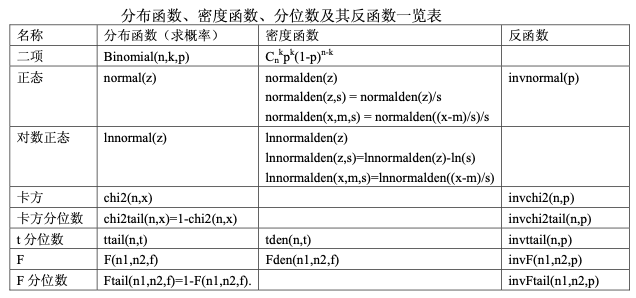

## 二项分布

In [6]:
di binomial(6,4,0.6) // 计算6次独立重复试验（成功概率0.6）中成功大于等于四次的概率。

.76672


In [9]:
di binomial(6,4,0.6) - binomial(6,5,0.6) //计算恰好四次概率

-.186624


## 正态分布

In [4]:
di normal(-1.96)

.0249979


In [5]:
di normal(1.96)

.9750021


(note: scheme plotplain not found, using s2color)


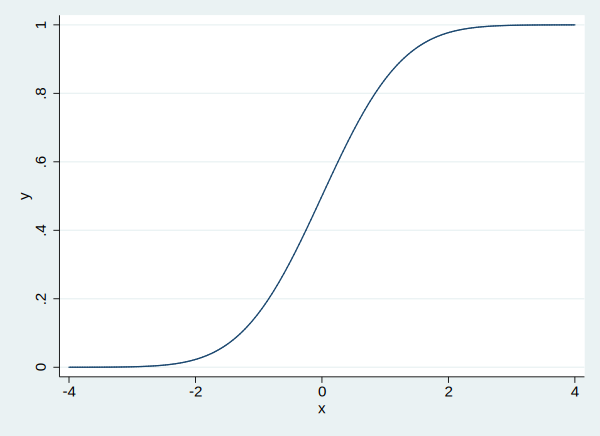

In [10]:
twoway function y=normal(x),range(-4 4) // 标准正态分布函数图示

In [13]:
mat z=J(61,11,.)
forvalues i=1/61{
    mat z[`i',1]=(`i'-31)/10
    forvalues j=2/11 {
        mat z[`i',`j']=normal((`i'-311)/10+(`j'-2)/100)
    }
}
matrix colnames z = z 0 1 2 3 4 5 6 7 8 9
mat list z, format(%5.4f)






z[61,11]
           z        0        1        2        3        4        5        6
 r1  -3.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000
 r2  -2.9000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000
 r3  -2.8000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000
 r4  -2.7000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000
 r5  -2.6000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000
 r6  -2.5000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000
 r7  -2.4000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000
 r8  -2.3000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000
 r9  -2.2000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000
r10  -2.1000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000
r11  -2.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000
r12  -1.9000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.000

In [14]:
di normal((115-100)/16)-normal((100-100)/16)

.32574929


(note: scheme plotplain not found, using s2color)


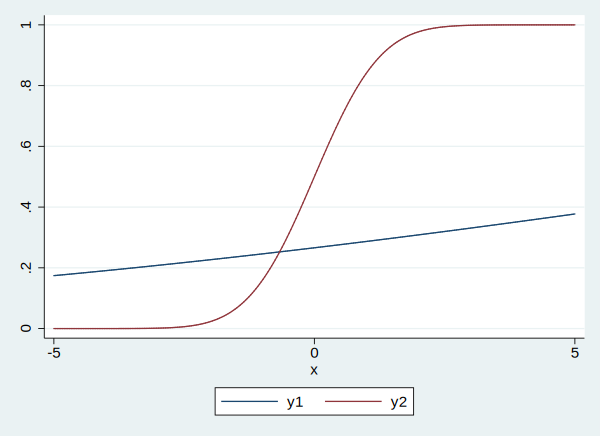

In [22]:
twoway function y1=normal((x-10)/16),range(-5 5) || function y2=normal(x),range(-5 5) // 正态分布函数图示

In [23]:
di invnormal(.975)

1.959964


In [24]:
di invnormal(.995)

2.5758293


In [26]:
di invnormal(0.9)*13+72

88.66017


### 服从正态分布的随机数



number of observations (_N) was 0, now 10,000


(bin=100, start=-3.5609962, width=.07414356)
(note: scheme plotplain not found, using s2color)


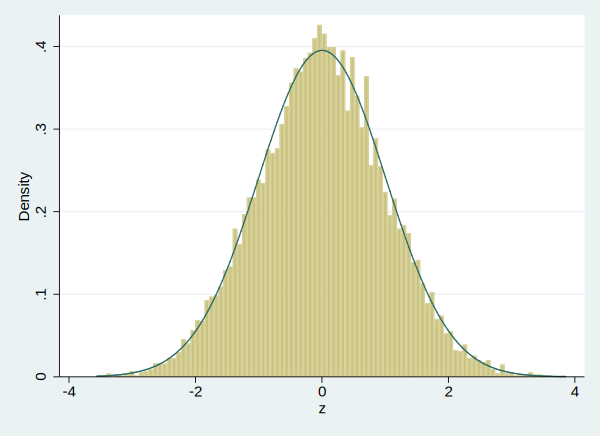

In [27]:
clear
set obs 10000
gen z=invnormal(uniform()) // 得到服从标准正态分布的随机数
hist z,bin(100) norm // 画出直方图并配上标准正态分布曲线

### 正态分布的密度函数

In [28]:
di normalden(1.95)

.05959471


In [30]:
di normalden(19.5,10)

.00595947


In [31]:
di normalden(29.5,10,10)

.00595947


In [33]:
#delimit; //表示每个分号为一个命令，不论是否分行
twoway 
    function y = normden(x),range(-4 4) ||s
    function y1= 2*normden(x-3),range(-4 7) ||
    function y2= 2*normden(x),range(-4 4) clstyle(foreground)
egend(off);
#delimit cr


delimiter now ;

>     noi gr export /Users/mac/.stata_kernel_cache/graph$stata_kernel_graph_coun
> ter.svg, width(600) replace
>     noi gr export /Users/mac/.stata_kernel_cache/graph$stata_kernel_graph_coun
> ter.pdf, replace
>     global stata_kernel_graph_counter = $stata_kernel_graph_counter + 1
> }            
>     function y = normden(x),range(-4 4) ||s
>     function y1= 2*normden(x-3),range(-4 7) ||
>     function y2= 2*normden(x),range(-4 4) clstyle(foreground)
> egend(off);
(note: scheme plotplain not found, using s2color)
invalid '{' 

. #delimit cr
delimiter now cr


### 分位数

In [34]:
di invnormal(0.95) // 上分位数

1.6448536


In [35]:
di invnorm(0.975) // 0.05双侧分位数

1.959964


# 十二讲 抽样分布

# 十三讲 参数估计与假设检验

# 十四讲 简单回归原理

# 十五讲 异方差模拟

# 十六讲 随机过程模拟

# 十七讲 基本定理模拟

# 十八讲 综合案例